### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

color = sns.color_palette()

%matplotlib inline


### Files and folders

In [2]:
from subprocess import check_output
#print(check_output(["ls", "./input"]).decode("utf8"))
os.listdir('.\input')

['aisles',
 'aisles.csv',
 'departments',
 'departments.csv',
 'orders',
 'orders.csv',
 'order_products__prior',
 'order_products__prior.csv',
 'order_products__train',
 'order_products__train.csv',
 'products',
 'products.csv',
 'sample_submission',
 'sample_submission.csv']

In [3]:
aisles_df = pd.read_csv('./input/aisles.csv')
departments_df = pd.read_csv('./input/departments.csv')
order_products__prior_df = pd.read_csv('./input/order_products__prior.csv')
order_products__train_df = pd.read_csv('./input/order_products__train.csv')
orders_df = pd.read_csv('./input/orders.csv')
products_df = pd.read_csv('./input/products.csv')
sample_submission_df = pd.read_csv('./input/sample_submission.csv')

### Aisles

In [4]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
aisles_df.shape

(134, 2)

### Departments

In [6]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments_df.shape

(21, 2)

### Orders - Prior

In [8]:
order_products__prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_products__prior_df.shape

(32434489, 4)

### Orders - Train

In [10]:
order_products__train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
order_products__train_df.shape

(1384617, 4)

### Orders

In [12]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [13]:
orders_df.shape
eval_set_distribution = orders_df.eval_set.value_counts()

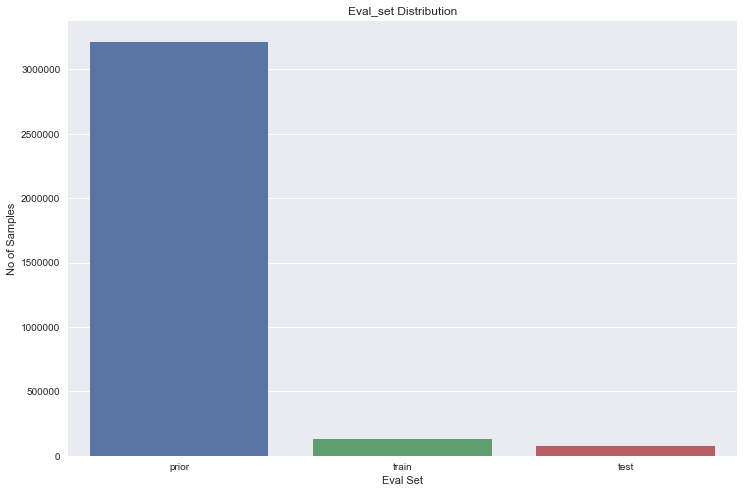

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(eval_set_distribution.index,eval_set_distribution.values)
plt.ylabel('No of Samples')
plt.xlabel('Eval Set')
#plt.xticks(rotation='vertical')
plt.title("Eval_set Distribution")
plt.show()

In [15]:
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [16]:
orders_df.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [17]:
orders_df[orders_df['days_since_prior_order'].isnull()==True]['eval_set'].value_counts()

prior    206209
Name: eval_set, dtype: int64

### Count of number of products in an order

In [18]:
cnt_srs = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
cnt_srs.head()

4    23986
5    19590
6    16165
7    13850
8    11700
Name: order_number, dtype: int64

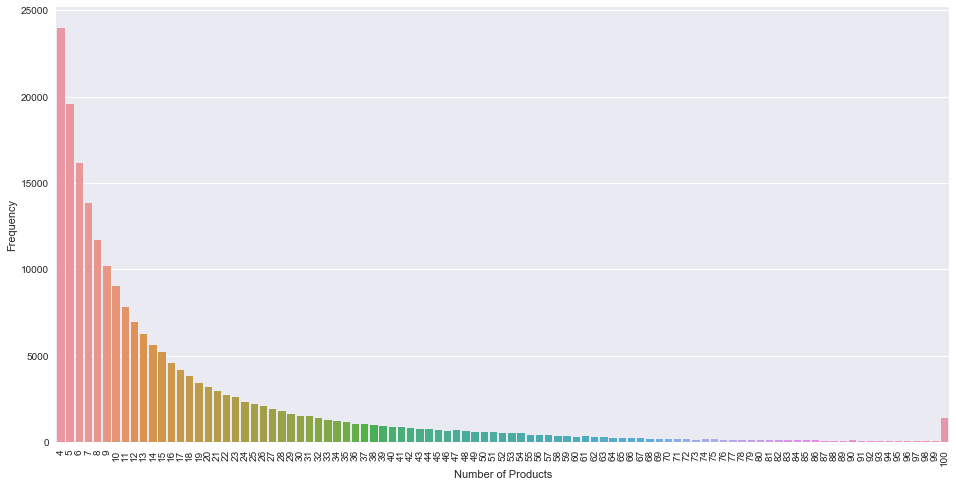

In [19]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

### Frequency of orders by day of the week

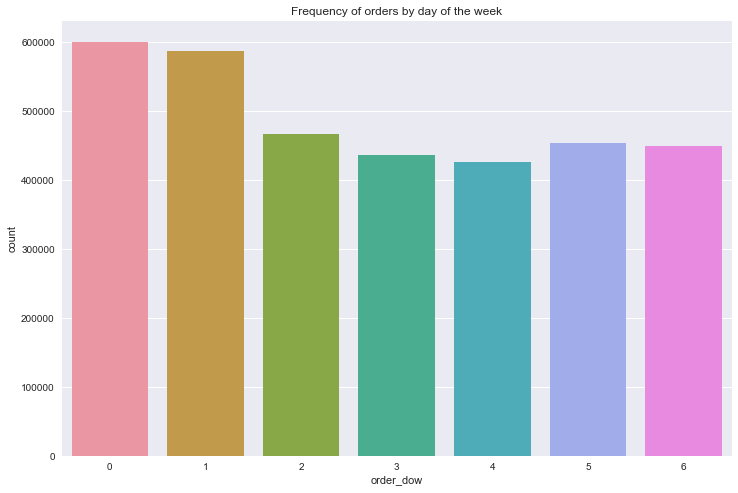

In [20]:
plt.figure(figsize=(12,8))
#cnt_srs = orders_df.order_dow.value_counts()
#sns.barplot(cnt_srs.index, cnt_srs.values)
sns.countplot(data=orders_df, x='order_dow')
plt.title('Frequency of orders by day of the week')
plt.show()

### Frequency of orders by hour of the day

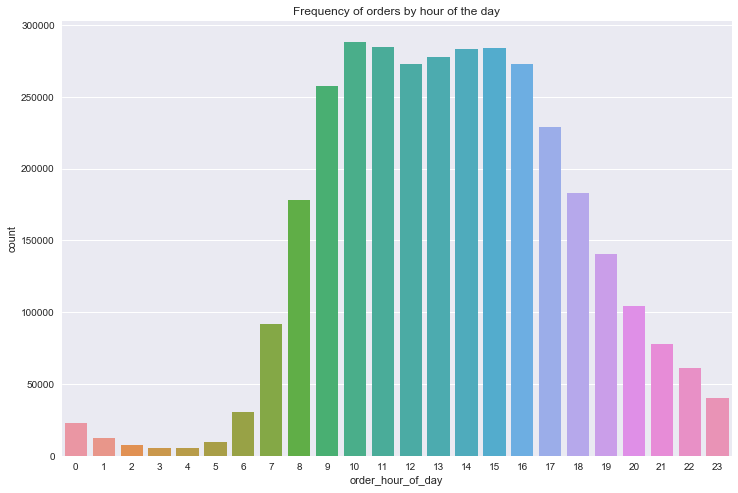

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(data=orders_df, x='order_hour_of_day')
plt.title('Frequency of orders by hour of the day')
plt.show()

### Frequency distribution by days since prior order

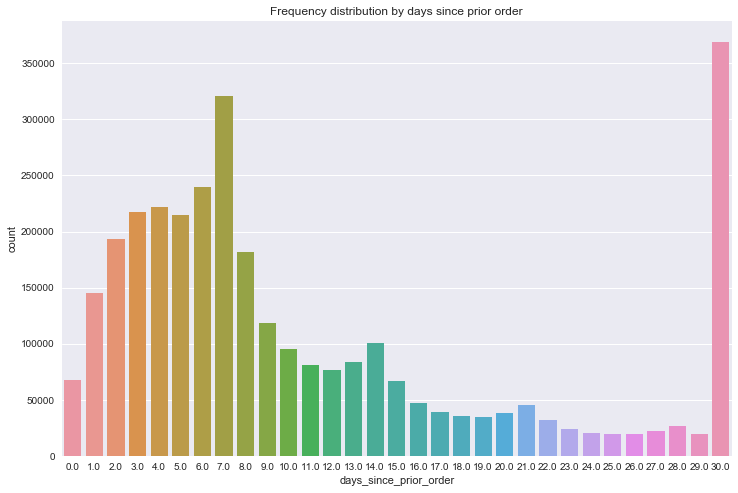

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(data=orders_df, x='days_since_prior_order')
plt.title('Frequency distribution by days since prior order')
plt.show()

### Percentage of reorders

#### Prior

In [29]:
print(order_products__prior_df.reordered.sum()/order_products__prior_df.shape[0])

0.5896974667922161


#### Train

In [30]:
print(order_products__train_df.reordered.sum()/order_products__train_df.shape[0])

0.5985944127509629


In [34]:
cnt_srs = order_products__prior_df['order_id'].value_counts()
cnt_srs.head()

1564244    145
790903     137
61355      127
2970392    121
2069920    116
Name: order_id, dtype: int64

### Product - Details

In [23]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [24]:
products_df.shape

(49688, 4)

### Products in Each Department

In [25]:
pd.merge(departments_df, products_df, on="department_id", how="inner")['department'].value_counts()

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: department, dtype: int64

### Sample submissions

In [26]:
sample_submission_df.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [27]:
sample_submission_df.shape

(75000, 2)